In [2]:
!pip install pycaret
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.2 MB/s e

In [1]:
import pycaret
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mathangpeddi/Flipkart-Web-Scraping/master/changed.csv')
df.head()

,Unnamed: 0,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price,RAM_GB,...,Generation,Operating System Type,Storage_GB,Disk Drive,Size(Inches),Company,Graphic Card,Touchscreen,SSD,HDD
0,0,HP Spectre x360 Core i5 10th Gen - (8 GB/512 G...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,33.78 cm (13.3 inch) Touchscreen Display,1 Year Onsite Warranty,102990.0,8,...,10,Windows,512,SSD,13.3,HP,No,Yes,512,0
1,1,Asus VivoBook 14 Core i5 8th Gen - (8 GB/512 G...,Intel Core i5 Processor (8th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,55990.0,8,...,8,Windows,512,SSD,14.0,Asus,Yes,No,512,0
2,2,Acer Aspire 7 Core i5 9th Gen - (8 GB/512 GB S...,Intel Core i5 Processor (9th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty (ITW),56990.0,8,...,9,Windows,512,SSD,15.6,Acer,Yes,No,512,0
3,3,Asus VivoBook 14 Ryzen 5 Quad Core 2nd Gen - (...,AMD Ryzen 5 Quad Core Processor (2nd Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,42990.0,8,...,2,Windows,512,SSD,14.0,Asus,No,No,512,0
4,4,HP 14s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,52990.0,8,...,10,Windows,512,SSD,14.0,HP,No,No,512,0


In [3]:
from pycaret.regression import *
reg = setup(data = df, target = 'Price')

,Description,Value
0,Session id,8785
1,Target,Price
2,Target type,Regression
3,Original data shape,"(168, 23)"
4,Transformed data shape,"(168, 112)"
5,Transformed train set shape,"(117, 112)"
6,Transformed test set shape,"(51, 112)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,16


In [4]:
X = df.drop('Price',axis=1)
Y = df['Price']
Y = pd.DataFrame(Y)

In [5]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,20167.0681,1177155440.6882,30872.6428,0.2293,0.3665,0.3197,0.6130
lightgbm,Light Gradient Boosting Machine,23120.1859,1464523508.2525,34945.8602,0.1188,0.4054,0.3511,0.4840
en,Elastic Net,22942.5327,1515859517.0181,35329.9282,0.0291,0.4103,0.3586,0.2680
lr,Linear Regression,22673.0535,1493241614.6002,35100.9598,0.0249,0.4105,0.3594,0.7860
ridge,Ridge Regression,22955.4567,1527216930.2845,35529.7308,0.0107,0.4143,0.3613,0.3600
lasso,Lasso Regression,22826.7253,1524981733.4917,35503.7796,0.0076,0.4153,0.3611,0.3600
ada,AdaBoost Regressor,23849.7513,1643931423.0661,36588.9940,-0.0012,0.4252,0.3721,0.3120
knn,K Neighbors Regressor,21756.4272,1530450243.2000,34946.7776,-0.0097,0.3990,0.3306,0.5490
omp,Orthogonal Matching Pursuit,23339.4410,1528522216.1359,35767.4548,-0.0168,0.4183,0.3674,0.4020
huber,Huber Regressor,26957.8542,2182518855.0225,42955.7986,-0.0199,0.4392,0.3236,0.2930


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=8785)

In [6]:
xgboost = create_model('xgboost', max_depth = 10, shuffle=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23153.6113,873382848.0000,29553.0508,-3.4832,0.5258,0.5805
1,36982.5078,3284464640.0000,57310.2500,0.0106,0.5452,0.4371
2,11339.5088,225450320.0000,15015.0029,0.9029,0.2011,0.1558
3,34553.3242,2236667904.0000,47293.4219,0.0480,0.6082,0.6149
4,28084.4844,4314556928.0000,65685.2891,0.2313,0.4771,0.2620
5,31660.6152,2969504512.0000,54493.1602,0.0577,0.5617,0.4877
6,10059.5166,268358208.0000,16381.6426,0.1244,0.2940,0.2056
7,20807.1309,1179998080.0000,34351.1016,0.0968,0.3632,0.2613
8,16554.3652,737586112.0000,27158.5371,0.5655,0.3054,0.1980


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
xgboost = tune_model(xgboost, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21302.5098,1242707072.0000,35252.0508,0.3788,0.4097,0.3625
1,21126.2676,849379520.0000,29144.1172,0.6446,0.4101,0.3719
2,29196.3750,3276152832.0000,57237.6875,0.2861,0.4661,0.3427
3,10940.6260,457511392.0000,21389.5156,0.4214,0.2180,0.1419
4,10463.0723,351749824.0000,18754.9941,0.8736,0.2316,0.1458
Mean,18605.7701,1235500128.0000,32355.6730,0.5209,0.3471,0.2730
Std,7082.9964,1067678378.1148,13733.5561,0.2121,0.1021,0.1058


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [8]:
predict_model(xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,23462.7891,1176284928.0000,34297.0117,0.2912,0.4228,0.3784


,Unnamed: 0,Description,Processor,RAM,Operating System,Storage,Display,Warranty,RAM_GB,DDR_Version,...,Storage_GB,Disk Drive,Size(Inches),Company,Graphic Card,Touchscreen,SSD,HDD,Price,prediction_label
8,8,Asus VivoBook Gaming Core i7 9th Gen - (16 GB ...,Intel Core i7 Processor (9th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Limited International Hardware Warranty,16,4,...,512,SSD,15.6,Asus,Yes,No,512,0,75990.0,85624.648438
33,33,Asus ZenBook Core i5 8th Gen - (8 GB/256 GB SS...,Intel Core i5 Processor (8th Gen),8 GB DDR3 RAM,Windows,256 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,8,3,...,256,SSD,14.0,Asus,No,No,256,0,47990.0,48147.960938
61,61,Apple MacBook Pro Core i7 9th Gen - (16 GB/512...,Intel Core i7 Processor (9th Gen),16 GB DDR4 RAM,Mac,512 GB SSD,40.64 cm (16 inch) Display,1 Year Onsite Warranty,16,4,...,512,SSD,16.0,Apple,Yes,No,512,0,199900.0,98355.992188
149,149,Apple MacBook Pro with Touch Bar Core i5 10th ...,Intel Core i5 Processor (10th Gen),16 GB LPDDR4X RAM,Mac OS Operating System,1 TB SSD,33.02 cm (13 inch) Display,1 Year Limited Hardware Warranty,16,4,...,1000,SSD,13.0,Apple,No,No,1,0,194900.0,98861.867188
59,59,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...,8th Gen Intel Core i5 for superior computing,8 GB RAM,Windows,256 GB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty Commencing from the Dat...,8,0,...,512,SSD,13.3,MarQ,No,No,256,0,41990.0,87047.179688
71,71,Lenovo Ideapad L340 Core i7 9th Gen - (8 GB/1 ...,Intel Core i7 Processor (9th Gen),8 GB DDR4 RAM,Windows,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,8,4,...,1000+128,Both,15.6,Lenovo,Yes,No,256,1000,73990.0,82549.257812
162,162,Microsoft Surface Pro 6 Core i7 8th Gen - (8 G...,Intel Core i7 Processor (8th Gen),8 GB DDR3 RAM,64 bit Windows 10 Operating System,256 GB SSD,31.24 cm (12.3 inch) Touchscreen Display,1 Year Limited Hardware Warranty,8,3,...,256,SSD,12.3,Microsoft,No,Yes,256,0,135990.0,75638.054688
123,123,Acer NITRO 5 Core i5 9th Gen - (8 GB/2 TB HDD/...,Intel Core i5 Processor (9th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,2 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Warranty,8,4,...,1000+256,Both,15.6,Acer,Yes,No,256,2000,84990.0,82843.750000
40,40,Dell Inspiron Core i3 10th Gen - (4 GB/1 TB HD...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,Windows,1 TB HDD|256 GB SSD,35.56 cm (14 inch) Touchscreen Display,"1 Year Limited Hardware Warranty, In Home Serv...",4,4,...,1000+256,Both,14.0,Dell,No,Yes,256,1000,59437.0,72644.742188
131,131,Asus VivoBook 14 Core i5 8th Gen - (8 GB/512 G...,Intel Core i5 Processor (8th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,8,4,...,512,SSD,14.0,Asus,No,No,512,0,50990.0,87491.242188


In [9]:
print(xgboost)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=120, n_jobs=-1,
             num_parallel_tree=None, random_state=8785, ...)


In [10]:
plot_model(xgboost, plot='parameter')

,Parameters
objective,reg:squarederror
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,0.5
device,cpu
early_stopping_rounds,None
enable_categorical,False


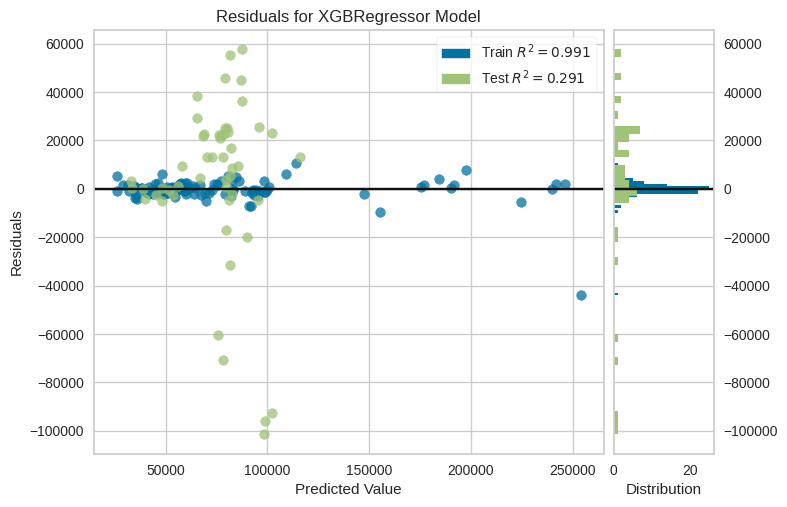

In [11]:
plot_model(xgboost, plot='residuals')

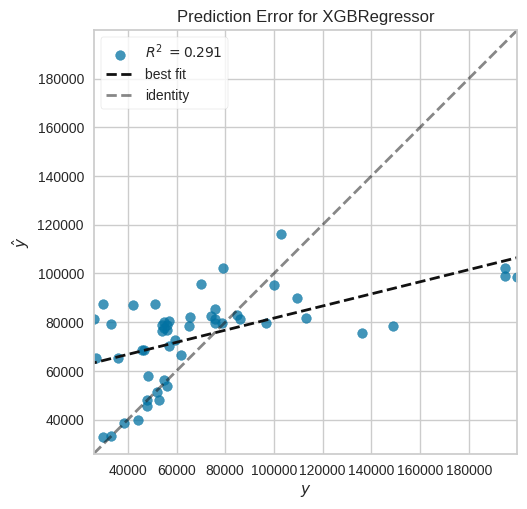

In [12]:
plot_model(xgboost, plot='error')

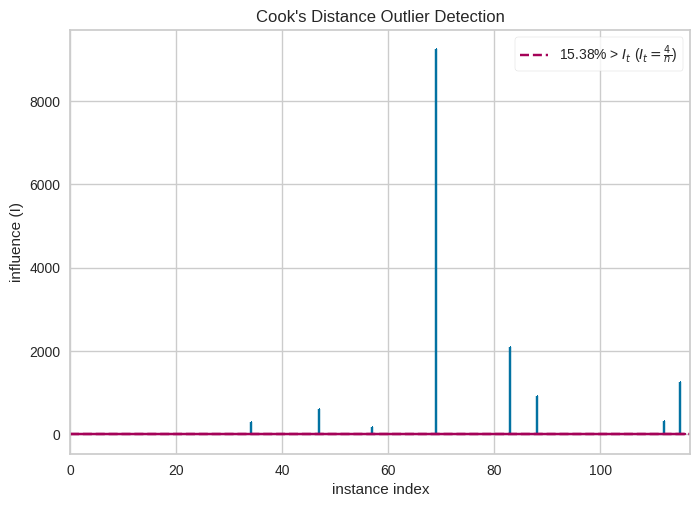

In [13]:
plot_model(xgboost, plot='cooks')

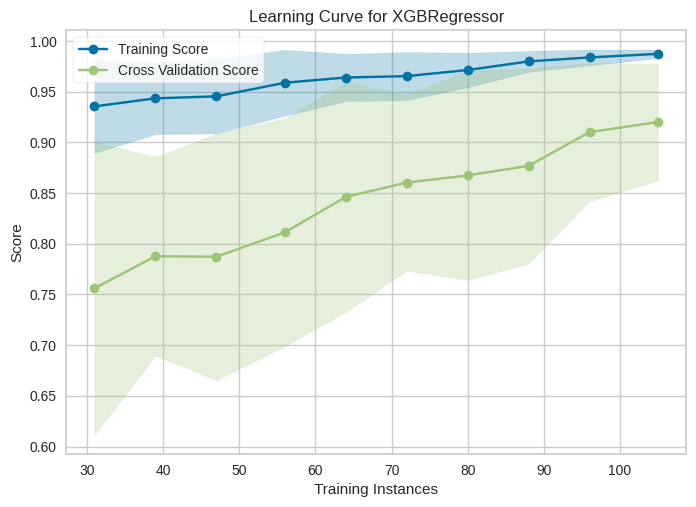

In [14]:
plot_model(xgboost, plot='learning')

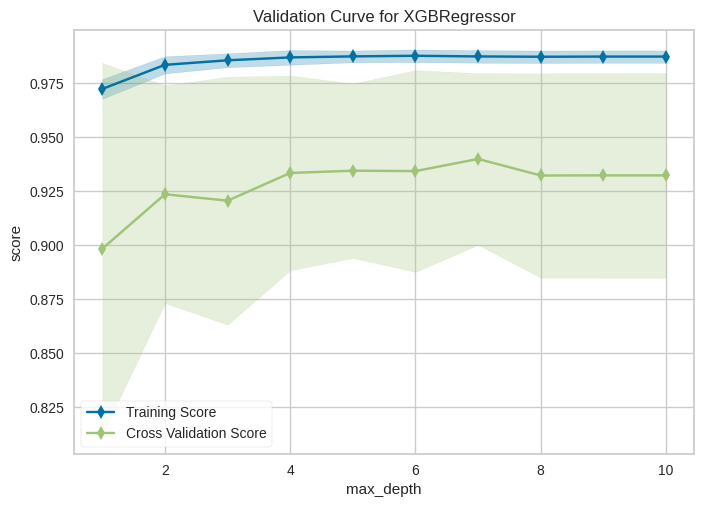

In [15]:
plot_model(xgboost, plot='vc')

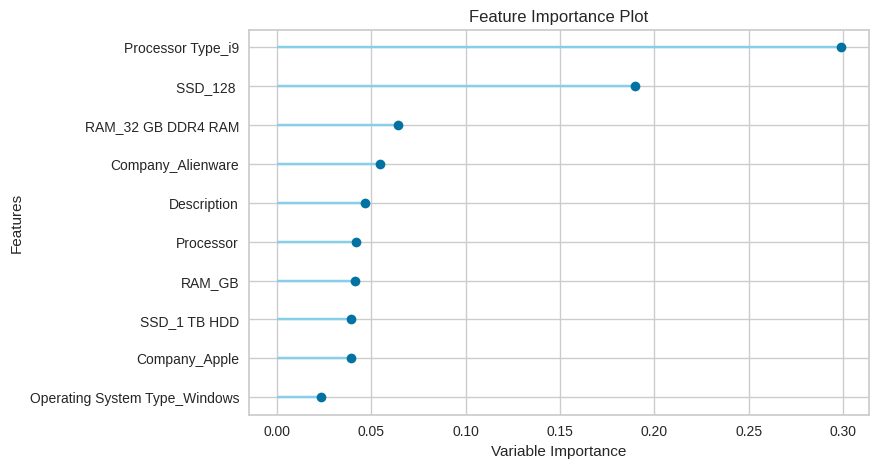

In [16]:
plot_model(xgboost, plot='feature')

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [18]:
final_xgboost = finalize_model(xgboost)

In [19]:
new_predictions = predict_model(xgboost, data=X_test)
new_predictions.head()

,Unnamed: 0,Description,Processor,RAM,Operating System,Storage,Display,Warranty,RAM_GB,DDR_Version,...,Operating System Type,Storage_GB,Disk Drive,Size(Inches),Company,Graphic Card,Touchscreen,SSD,HDD,prediction_label
8,8,Asus VivoBook Gaming Core i7 9th Gen - (16 GB ...,Intel Core i7 Processor (9th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Limited International Hardware Warranty,16,4,...,Windows,512,SSD,15.6,Asus,Yes,No,512,0,85624.648438
33,33,Asus ZenBook Core i5 8th Gen - (8 GB/256 GB SS...,Intel Core i5 Processor (8th Gen),8 GB DDR3 RAM,Windows,256 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,8,3,...,Windows,256,SSD,14.0,Asus,No,No,256,0,48147.960938
61,61,Apple MacBook Pro Core i7 9th Gen - (16 GB/512...,Intel Core i7 Processor (9th Gen),16 GB DDR4 RAM,Mac,512 GB SSD,40.64 cm (16 inch) Display,1 Year Onsite Warranty,16,4,...,Mac,512,SSD,16.0,Apple,Yes,No,512,0,98355.992188
149,149,Apple MacBook Pro with Touch Bar Core i5 10th ...,Intel Core i5 Processor (10th Gen),16 GB LPDDR4X RAM,Mac OS Operating System,1 TB SSD,33.02 cm (13 inch) Display,1 Year Limited Hardware Warranty,16,4,...,Mac,1000,SSD,13.0,Apple,No,No,1,0,98861.867188
59,59,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...,8th Gen Intel Core i5 for superior computing,8 GB RAM,Windows,256 GB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty Commencing from the Dat...,8,0,...,Windows,512,SSD,13.3,MarQ,No,No,256,0,87047.179688


In [20]:
save_model(xgboost, model_name = 'deployment_08082020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Unnamed: 0', 'RAM_GB',
                                              'DDR_Version', 'Generation',
                                              'Size(Inches)', 'HDD'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Description', 'Processor', 'RAM',
                                              'Operating System', 'Storage',
                                              'Display', 'Warranty',
                                              'Processor Name', 'Process...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
           

In [21]:
deployment_08082020 = load_model('deployment_08082020')

Transformation Pipeline and Model Successfully Loaded


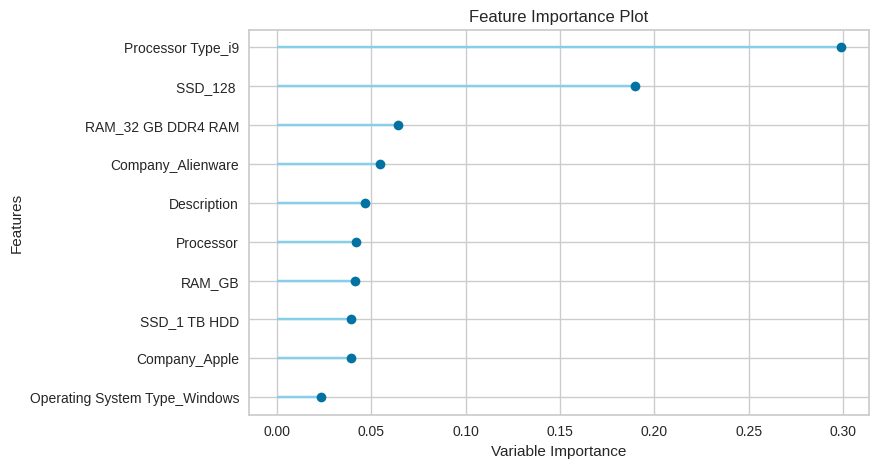

In [22]:
plot_model(deployment_08082020, plot='feature')

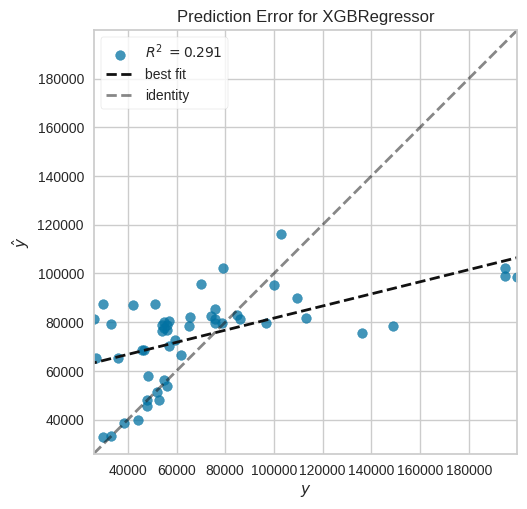

In [23]:
plot_model(deployment_08082020, plot='error')